In [2]:
import biom
import skbio
import pandas as pd
from biom.table import Table

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from skbio.stats.composition import closure
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib import ticker
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['xtick.labelsize']=20
%matplotlib inline



## example

In [3]:
table = biom.load_table('defaults/mini.biom')
table.to_dataframe()


,Sample1,Sample2
Genome1,0.3,0.2
Genome2,0.0,0.3
Genome3,0.6,0.4


In [3]:
table.metadata_to_dataframe(axis='observation').values
table.table_id

#### test: just chnage observations

In [4]:
Taxon1 = ('k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;'
         'o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas aeruginosa')
Taxon2 = ('k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;'
          'g__Escherichia;s__Escherichia coli')
Taxon3 = ('k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales'
          ';f__Bacillaceae;g__Bacillus;s__Bacillus subtilis')
Taxon4 = ('k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae'
          ';g__Enterococcus;s__Enterococcus faecalis')


In [5]:
mttaxa = table.metadata_to_dataframe(axis='observation').copy()
#print(mttaxa)
#mttaxa.loc['Genome1','taxonomy'] = Taxon1
#mttaxa.loc['Genome2','taxonomy'] = Taxon2
#mttaxa.loc['Genome3','taxonomy'] = Taxon3
mttaxa

,taxonomy
Genome1,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Genome2,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Genome3,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...


In [6]:
observ_metadata = [{'taxonomy':[t_]}  
                   for t_ in [Taxon1,Taxon2,Taxon3]]
observ_metadata

[{'taxonomy': ['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas aeruginosa']},
 {'taxonomy': ['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli']},
 {'taxonomy': ['k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus;s__Bacillus subtilis']}]

In [7]:
ntable = Table(table.to_dataframe().values, 
              table.to_dataframe().index, 
              table.to_dataframe().columns, 
              observ_metadata, table_id='default_copy')

with biom.util.biom_open('new_default.biom', 'w') as f:
    ntable.to_hdf5(f, "test")

In [8]:
test = biom.load_table('new_default.biom')
test.to_dataframe()

,Sample1,Sample2
Genome1,0.3,0.2
Genome2,0.0,0.3
Genome3,0.6,0.4


In [10]:
test.metadata_to_dataframe(axis='observation')


,taxonomy_0
Genome1,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Genome2,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Genome3,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...


## toy simulation

This is a simple _easy_ case scenario and is by no means a challenge benchmark. 

Phylogenetically diverse microbes covering large GC% range and both gram stains.

| Species | Species | GC% | Gram |
| --- | --- | --- | --- |
| Taxon 1 | Pseudomonas aeruginosa | 66.2 | - |
| Taxon 2 | Bacillus subtilis | 43.8 | + |
| Taxon 3 | Enterococcus faecalis | 37.38 | + |
| Taxon 4 | Pseudomonas stutzeri  | 63.93 | - |



In [66]:
Taxon1 = ('k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;'
         'o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas aeruginosa')
Taxon2 = ('k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales'
          ';f__Bacillaceae;g__Bacillus;s__Bacillus subtilis')
Taxon3 = ('k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae'
          ';g__Enterococcus;s__Enterococcus faecalis')
Taxon4 = ('k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;'
         'o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas stutzeri')


In [67]:
#toy
n = 5
t = np.linspace(1, 10, n)
x1 = np.exp(t) * 0.01
x2 = abs(np.random.normal(size=n))*.05 + [100]*n
#x2 = np.random.normal(size=n) + 10
x3 = np.random.normal(size=n) * 40 + 10
x4 = x1[::-1]
X = np.vstack((x1, x2, x3, x4)).T
X[X<.05]=0
#X_rel = np.around(closure(X),1)
X_rel = (X.T * .9/X.sum(axis=1)).T
#pd.DataFrame(X).to_csv('simfiles/count_toy.csv')
#pd.DataFrame(X_rel).to_csv('simfiles/count_toy.csv')



In [68]:
X_rel.sum(axis=1)

array([0.9, 0.9, 0.9, 0.9, 0.9])

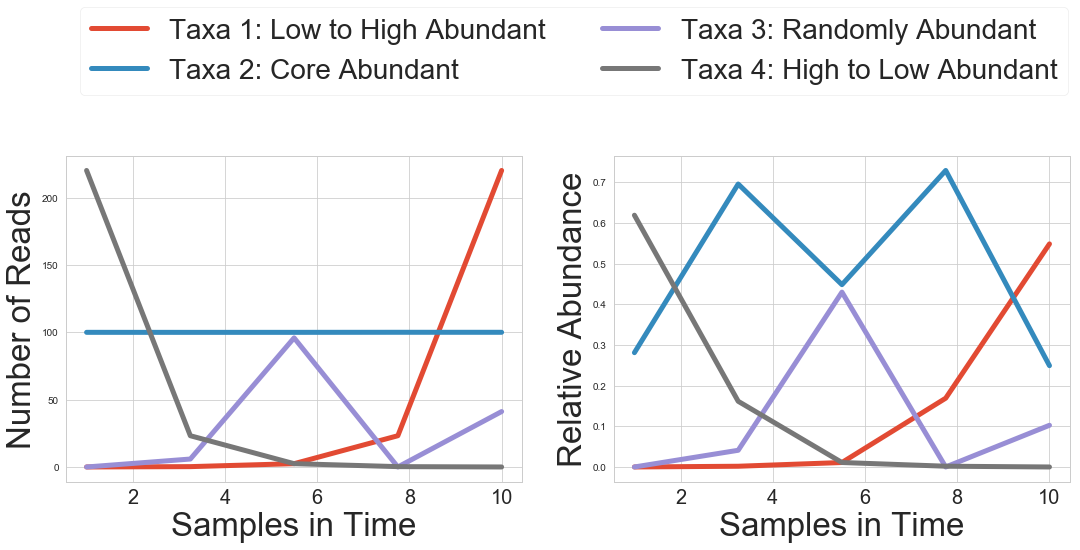

In [82]:
fig,(ax,ax2) = plt.subplots(1,2,figsize=(18, 6), facecolor='white')
ticksize=19
labelsize=22
ax.plot(t, X[:,0], label='Taxa 1: Low to High Abundant',lw=5)
ax.plot(t, X[:,1], label='Taxa 2: Core Abundant',lw=5)
ax.plot(t, X[:,2], label='Taxa 3: Randomly Abundant',lw=5)
ax.plot(t, X[:,3], label='Taxa 4: High to Low Abundant',lw=5)
legend = ax.legend(loc=2, 
            bbox_to_anchor=(-0., 1.5),
            prop={'size':28},
            fancybox=True, framealpha=0.5,ncol=2
            , markerscale=50, facecolor="white")
legend.get_title().set_fontsize(25)
ax.set_ylabel('Number of Reads',fontsize=33)
ax.set_xlabel('Samples in Time',fontsize=33)

ax2.plot(t, X_rel[:,0], label='Low to High Abundant',lw=5)
ax2.plot(t, X_rel[:,1], label='Core Abundant',lw=5)
ax2.plot(t, X_rel[:,2], label='Randomly Abundant',lw=5)
ax2.plot(t, X_rel[:,3], label='High to Low Abundant',lw=5)
ax2.set_ylabel('Relative Abundance',fontsize=33)
ax2.set_xlabel('Samples in Time',fontsize=33)
plt.savefig('supp_figure.png',dpi=300, 
            bbox_inches='tight',  transparent=True)
plt.show()

In [70]:
new_time_table = pd.DataFrame(X_rel,columns=['Genome'+str(i+1) for i in range(X_rel.shape[1])],
                              index=['Sample'+str(i+1) for i in range(X_rel.shape[0])]).T
new_time_table.head(5)

,Sample1,Sample2,Sample3,Sample4,Sample5
Genome1,0.000000,0.001794,0.010967,0.169142,0.548405
Genome2,0.281049,0.695662,0.448227,0.728979,0.249088
Genome3,0.000000,0.041044,0.429840,0.000000,0.102507
Genome4,0.618951,0.161500,0.010967,0.001879,0.000000


In [71]:
observ_metadata = [{'taxonomy':[t_]}  
                   for t_ in [Taxon1,Taxon2,Taxon3,Taxon4]]
observ_metadata


[{'taxonomy': ['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas aeruginosa']},
 {'taxonomy': ['k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus;s__Bacillus subtilis']},
 {'taxonomy': ['k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus faecalis']},
 {'taxonomy': ['k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas stutzeri']}]

In [72]:
ntable = Table(new_time_table.values, 
              new_time_table.index, 
              new_time_table.columns, 
              observ_metadata, table_id='default_copy')

with biom.util.biom_open('time_species_resolution.biom', 'w') as f:
    ntable.to_hdf5(f, "test")


In [73]:
table = biom.load_table('time_species_resolution.biom')
table.to_dataframe()


,Sample1,Sample2,Sample3,Sample4,Sample5
Genome1,0.000000,0.001794,0.010967,0.169142,0.548405
Genome2,0.281049,0.695662,0.448227,0.728979,0.249088
Genome3,0.000000,0.041044,0.429840,0.000000,0.102507
Genome4,0.618951,0.161500,0.010967,0.001879,0.000000


In [74]:
table.metadata_to_dataframe(axis='observation').copy()


,taxonomy_0
Genome1,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...
Genome2,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...
Genome3,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
Genome4,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...


In [88]:
len('GGCGAATGGATCACCCGCCAGATCAACAGCATGCCGGCAAGGAACACCGAGAGCACGAAG')




60